In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits import mplot3d
import random

In [2]:
banana = pd.read_csv('banana.csv')
orange = pd.read_csv('orange.csv')
green_apple = pd.read_csv('green_apple.csv')

In [7]:
banana['label'] = 'banana'
orange['label'] = 'orange'
green_apple['label'] = 'green apple'

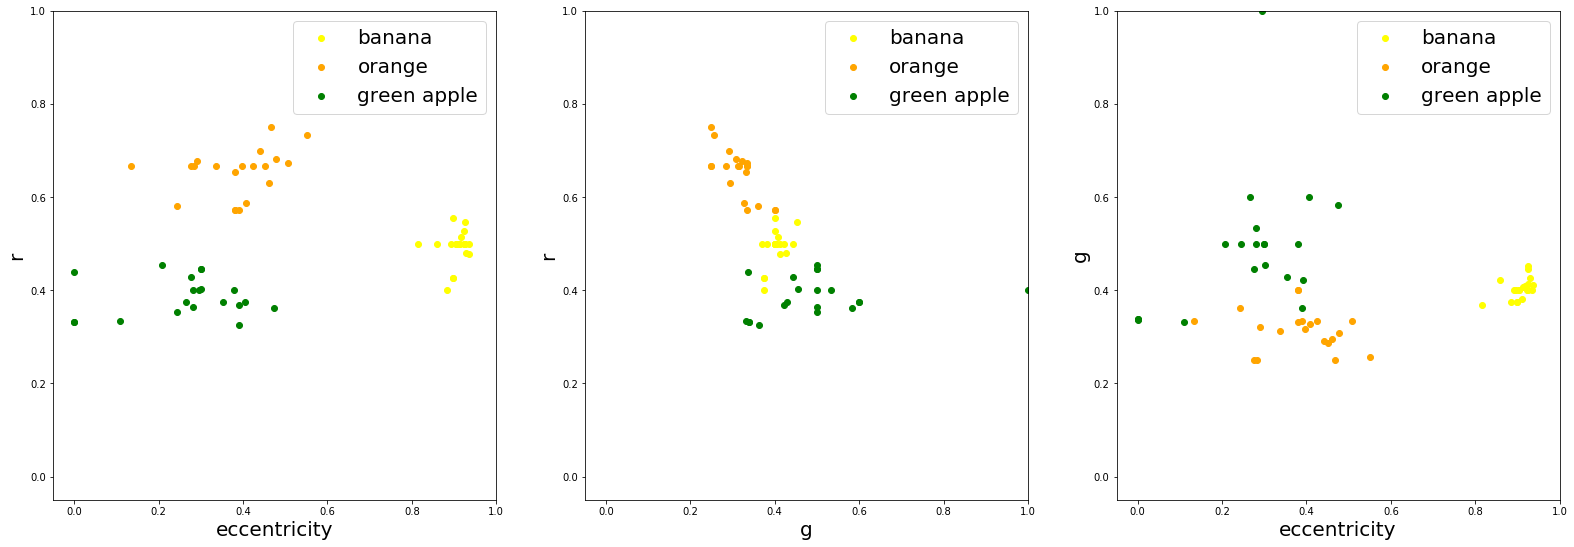

In [322]:
plt.figure(figsize=[9*3,9])
plt.subplot(131)
plt.scatter(banana['eccentricity'], banana['r'], color='yellow', label='banana')
plt.scatter(orange['eccentricity'], orange['r'], color='orange', label='orange')
plt.scatter(green_apple['eccentricity'], green_apple['r'], color='green', label='green apple')
plt.xlim(-0.05,1)
plt.ylim(-0.050,1)
plt.xlabel('eccentricity', fontsize=20)
plt.ylabel('r', fontsize=20)
plt.legend(fontsize=20)

plt.subplot(132)
plt.scatter(banana['g'], banana['r'], color='yellow', label='banana')
plt.scatter(orange['g'], orange['r'], color='orange', label='orange')
plt.scatter(green_apple['g'], green_apple['r'], color='green', label='green apple')
plt.xlim(-0.05,1)
plt.ylim(-0.050,1)
plt.xlabel('g', fontsize=20)
plt.ylabel('r', fontsize=20)
plt.legend(fontsize=20)

plt.subplot(133)
plt.scatter(banana['eccentricity'], banana['g'], color='yellow', label='banana')
plt.scatter(orange['eccentricity'], orange['g'], color='orange', label='orange')
plt.scatter(green_apple['eccentricity'], green_apple['g'], color='green', label='green apple')
plt.xlim(-0.05,1)
plt.ylim(-0.050,1)
plt.xlabel('eccentricity', fontsize=20)
plt.ylabel('g', fontsize=20)
plt.legend(fontsize=20)

plt.show()

In [310]:
random.seed(301)

def g(a):
    if a>=0: return 1
    else: return -1


def two_classes(x1,x2,x3,x4):    
    vals = np.zeros(len(x1))
    vals[vals==0] = 1

    vals1 = np.zeros(len(x3))
    vals1[vals1==0] = -1

    X1 = list(zip(vals,x1, x2))
    X2 = list(zip(vals,x3, x4))
    X = X1 + X2
    X = np.array(X)
    X = X.astype(float)

    D1 = np.zeros(len(X1))
    D1[D1==0] = 1 
    D2 = np.zeros(len(X2))
    D2[D2==0] = -1
    D = np.append(D1,D2)

    return X,D

def perceptron(X,D):
    w = np.zeros(3)
    w[0],w[1],w[2] = random.random(), random.random(),random.random()

    eta = random.random()

    time = 100 #can be longer
    for t in range(time):
        for i,x in enumerate(X):
            a = np.dot(x.T,w)
            z = g(a)
            delta_w = eta*(D[i] - z)*x
            w += delta_w
    return w

def line_parameters(w):
    A, B, C = w[1], w[2], -w[0]
    m = -A/B
    b = C/B
    return m, b

## Eccentricity vs. r

In [311]:
X1,D1 = two_classes(banana['eccentricity'], banana['r'], orange['eccentricity'], orange['r'])
w1 = perceptron(X1,D1)
m1,b1 = line_parameters(w1)

X2,D2 = two_classes(banana['eccentricity'], banana['r'], green_apple['eccentricity'], green_apple['r'])
w2 = perceptron(X2,D2)
m2,b2 = line_parameters(w2)

X3,D3 = two_classes(orange['eccentricity'], orange['r'], green_apple['eccentricity'], green_apple['r'])
w3 = perceptron(X3,D3)
m3,b3 = line_parameters(w3)

In [312]:
print(m1,b1)
print(m2,b2)
print(m3,b3)

3.420573343187959 -1.9113228145453978
-48.461768505113234 28.133214080363302
-0.5032143452786035 0.6993570571145907


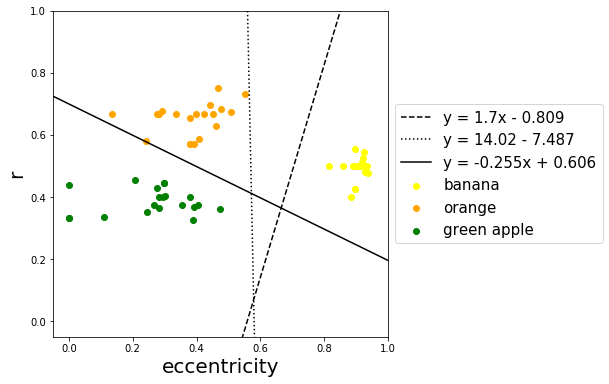

In [313]:
plt.figure(figsize=[6,6])
xvals = np.linspace(-1,1,100)
yvals1 = b1 + m1*xvals
yvals2 = b2 + m2*xvals
yvals3 = b3 + m3*xvals
plt.plot(xvals, yvals1, color='black', linestyle='--', label = 'y = 1.7x - 0.809')
plt.plot(xvals, yvals2, color='black', linestyle='dotted', label = 'y = 14.02 - 7.487')
plt.plot(xvals, yvals3, color='black', label = 'y = -0.255x + 0.606')
plt.scatter(banana['eccentricity'], banana['r'], color='yellow', label='banana')
plt.scatter(orange['eccentricity'], orange['r'], color='orange', label='orange')
plt.scatter(green_apple['eccentricity'], green_apple['r'], color='green', label='green apple')
plt.xlim(-0.05,1)
plt.ylim(-0.050,1)
plt.xlabel('eccentricity', fontsize=20)
plt.ylabel('r', fontsize=20)
plt.legend(fontsize=15,loc='center left', bbox_to_anchor=(1, 0.5))

## r vs. g

In [314]:
X1,D1 = two_classes(banana['g'], banana['r'], orange['g'], orange['r'])
w1 = perceptron(X1,D1)
m1,b1 = line_parameters(w1)

X2,D2 = two_classes(banana['g'], banana['r'], green_apple['g'], green_apple['r'])
w2 = perceptron(X2,D2)
m2,b2 = line_parameters(w2)

X3,D3 = two_classes(orange['g'], orange['r'], green_apple['g'], green_apple['r'])
w3 = perceptron(X3,D3)
m3,b3 = line_parameters(w3)

In [315]:
print(m1,b1)
print(m2,b2)
print(m3,b3)

1.6114604278892564 -0.08157053269883895
1.1642484203349714 0.19678346295848625
0.7094634286966529 0.2785620124071904


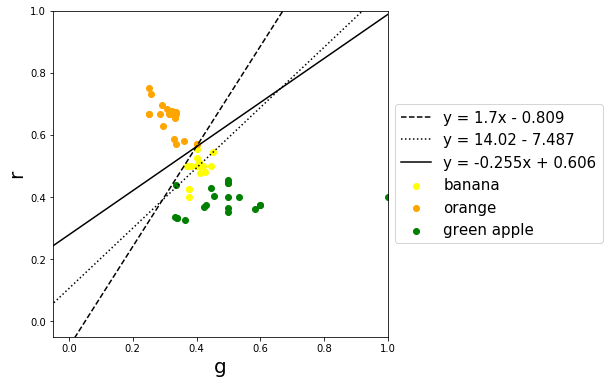

In [309]:
plt.figure(figsize=[6,6])
xvals = np.linspace(-1,1,100)
yvals1 = b1 + m1*xvals
yvals2 = b2 + m2*xvals
yvals3 = b3 + m3*xvals
plt.plot(xvals, yvals1, color='black', linestyle='--', label = 'y = 1.7x - 0.809')
plt.plot(xvals, yvals2, color='black', linestyle='dotted', label = 'y = 14.02 - 7.487')
plt.plot(xvals, yvals3, color='black', label = 'y = -0.255x + 0.606')
plt.scatter(banana['g'], banana['r'], color='yellow', label='banana')
plt.scatter(orange['g'], orange['r'], color='orange', label='orange')
plt.scatter(green_apple['g'], green_apple['r'], color='green', label='green apple')
plt.xlim(-0.05,1)
plt.ylim(-0.050,1)
plt.xlabel('g', fontsize=20)
plt.ylabel('r', fontsize=20)
plt.legend(fontsize=15,loc='center left', bbox_to_anchor=(1, 0.5))

## eccentricity vs. g

In [317]:
X1,D1 = two_classes(banana['eccentricity'], banana['g'], orange['eccentricity'], orange['g'])
w1 = perceptron(X1,D1)
m1,b1 = line_parameters(w1)

X2,D2 = two_classes(banana['eccentricity'], banana['g'], green_apple['eccentricity'], green_apple['g'])
w2 = perceptron(X2,D2)
m2,b2 = line_parameters(w2)

X3,D3 = two_classes(orange['eccentricity'], orange['g'], green_apple['eccentricity'], green_apple['g'])
w3 = perceptron(X3,D3)
m3,b3 = line_parameters(w3)

In [318]:
print(m1,b1)
print(m2,b2)
print(m3,b3)

-1.2177597144469468 1.0227882558445276
2.0971925301028795 -0.925099154224811
0.14908900328486166 0.26592098318494994


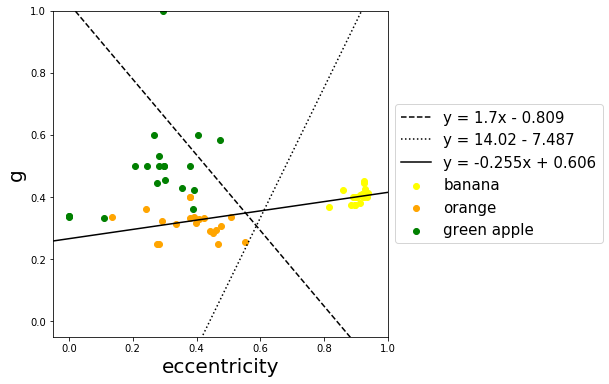

In [324]:
plt.figure(figsize=[6,6])
xvals = np.linspace(-1,1,100)
yvals1 = b1 + m1*xvals
yvals2 = b2 + m2*xvals
yvals3 = b3 + m3*xvals
plt.plot(xvals, yvals1, color='black', linestyle='--', label = 'y = 1.7x - 0.809')
plt.plot(xvals, yvals2, color='black', linestyle='dotted', label = 'y = 14.02 - 7.487')
plt.plot(xvals, yvals3, color='black', label = 'y = -0.255x + 0.606')
plt.scatter(banana['eccentricity'], banana['g'], color='yellow', label='banana')
plt.scatter(orange['eccentricity'], orange['g'], color='orange', label='orange')
plt.scatter(green_apple['eccentricity'], green_apple['g'], color='green', label='green apple')
plt.xlim(-0.05,1)
plt.ylim(-0.050,1)
plt.xlabel('eccentricity', fontsize=20)
plt.ylabel('g', fontsize=20)
plt.legend(fontsize=15,loc='center left', bbox_to_anchor=(1, 0.5))

In [323]:
green_apple

,label,eccentricity,r,g,color
0,green apple,0.379194,0.400000,0.500000,green
1,green apple,0.299358,0.444444,0.500000,green
2,green apple,0.208090,0.454545,0.500000,green
3,green apple,0.299358,0.444444,0.500000,green
4,green apple,0.352993,0.375000,0.428571,green
5,green apple,0.244798,0.352941,0.500000,green
6,green apple,0.405343,0.375000,0.600000,green
7,green apple,0.390193,0.325000,0.362500,green
8,green apple,0.281213,0.363636,0.500000,green
9,green apple,0.473921,0.361217,0.582645,green
